In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [3]:
class BatsmanState(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int
    
    sr: float
    bpb: float
    boundary_percent: float
    
    summary: str

In [5]:
def calc_sr(state: BatsmanState):
    sr = state['runs']/state['balls']
    sr = sr * 100
    return {'sr': sr}

In [6]:
def calc_bpb(state: BatsmanState):
    bpb = state['balls']/(state['fours'] + state['sixes'])
    return {'bpb': bpb}

In [7]:
def calc_bp(state: BatsmanState):
    boundary_percent = (((state['fours'] * 4) + (state['sixes'] * 6))/state['runs'])*100
    return {'boundary_percent': boundary_percent}

In [8]:
def summary(state: BatsmanState):
    summary = f"""
    Strike Rate - {state['sr']} \n
    Balls per boundary - {state['bpb']} \n
    Boundary percent - {state['boundary_percent']}
    """
    return {'summary': summary}

In [9]:
# Define graph
graph = StateGraph(BatsmanState)

# Add nodes to the graph
graph.add_node('calc_sr', calc_sr)
graph.add_node('calc_bpb', calc_bpb)
graph.add_node('calc_bp', calc_bp)
graph.add_node('summary', summary)

# Add edges to the graph
graph.add_edge(START, 'calc_sr')
graph.add_edge(START, 'calc_bpb')
graph.add_edge(START, 'calc_bp')

graph.add_edge('calc_sr', 'summary')
graph.add_edge('calc_bpb', 'summary')
graph.add_edge('calc_bp', 'summary')

graph.add_edge('summary', END)


In [10]:
# Compile the graph
workflow = graph.compile()

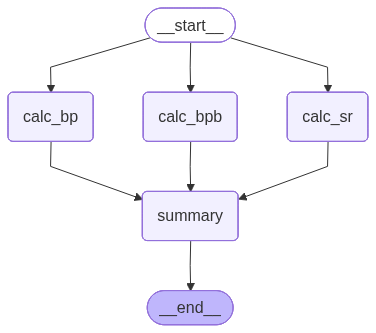

In [11]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [12]:
initial_state = {'runs': 200, 'balls': 120, 'fours': 16, 'sixes': 10}
workflow.invoke(initial_state)

{'runs': 200,
 'balls': 120,
 'fours': 16,
 'sixes': 10,
 'sr': 166.66666666666669,
 'bpb': 4.615384615384615,
 'boundary_percent': 62.0,
 'summary': '\n    Strike Rate - 166.66666666666669 \n\n    Balls per boundary - 4.615384615384615 \n\n    Boundary percent - 62.0\n    '}